In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rc('axes', axisbelow=True)

from utils.visualization import plot_median_errorbars

In [2]:
## HUBERT models (bias: ?, weight tying: ?)

with open('../_data/fig-symmetry-audio-models/full-models/HUBERT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-audio-models/HUBERT.pkl', 'rb') as file:
    params = pickle.load(file)

HUBERT_par = [params[key][0] for key in list(params.keys())]
HUBERT_score = [models[key][-1].flatten() for key in list(models.keys())]

## SpeechT5 models (bias: ?, weight tying: ?)

with open('../_data/fig-symmetry-audio-models/full-models/SpeechT5Encoder-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-audio-models/SpeechT5.pkl', 'rb') as file:
    params = pickle.load(file)

SpeechT5Encoder_par = [params[key][0] for key in list(params.keys())]
SpeechT5Encoder_score = [models[key][-1].flatten() for key in list(models.keys())]

## MusicGen models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-audio-models/full-models/MusicGenEncoder-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-audio-models/MusicGen.pkl', 'rb') as file:
    params = pickle.load(file)

MusicGenEncoder_par = [params[key][0] for key in list(params.keys())][:-2]
MusicGenEncoder_score = [models[key][-1].flatten() for key in list(models.keys())]

'------------------------------------------'

## SpeechT5 models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-audio-models/full-models/SpeechT5Decoder-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-audio-models/SpeechT5.pkl', 'rb') as file:
    params = pickle.load(file)

SpeechT5Decoder_par = [params[key][0] for key in list(params.keys())]
SpeechT5Decoder_score = [models[key][-1].flatten() for key in list(models.keys())]

## MusicGen models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-audio-models/full-models/MusicGenDecoder-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-audio-models/MusicGen.pkl', 'rb') as file:
    params = pickle.load(file)

MusicGenDecoder_par = [params[key][0] for key in list(params.keys())]
MusicGenDecoder_score = [models[key][-1].flatten() for key in list(models.keys())]

/Users/matteosaponati/Desktop/repos/attention-geometry/utils/visualization.py:77: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(parameters[k], median, yerr = [[q1_range], [q2_range]],


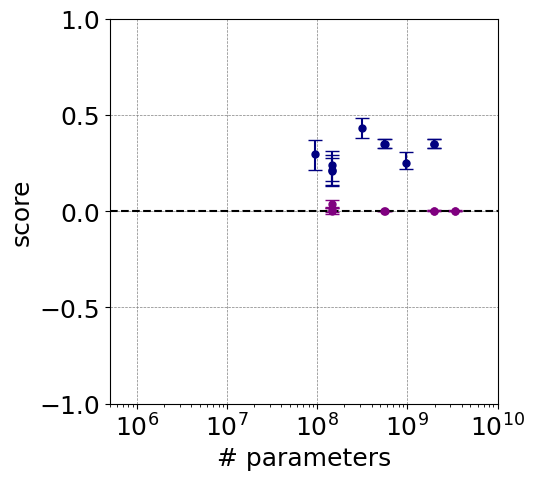

In [3]:
plt.figure(figsize=(5,5))

plot_median_errorbars(HUBERT_par, HUBERT_score, color = 'navy')
plot_median_errorbars(SpeechT5Encoder_par, SpeechT5Encoder_score, color = 'navy')
plot_median_errorbars(MusicGenEncoder_par, MusicGenEncoder_score, color = 'navy')

plot_median_errorbars(SpeechT5Decoder_par, SpeechT5Decoder_score, color = 'purple')
plot_median_errorbars(MusicGenDecoder_par, MusicGenDecoder_score, color = 'purple')

plt.axhline(y=0,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
plt.ylim(-1,1)
plt.ylabel('score')
plt.xlabel('# parameters')
plt.xlim(5e5,1e10)

plt.savefig('../figures/fig-pretrained-models-audio.pdf', format='pdf', dpi=300)